## Connect Drive

In [207]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Import Packages

In [208]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

## Read and split training file

In [241]:
whole_dataset = "/content/drive/MyDrive/term project/final_training_data/merged_data.csv"
normalized_dataset = "/content/drive/MyDrive/term project/final_training_data/normalized_merged_data.csv"
MCI_dataset = "/content/drive/MyDrive/term project/final_training_data/MCI_data.csv"
MCI_AD = "/content/drive/MyDrive/term project/final_training_data/MCI_patient.csv"
modified_result = "/content/drive/MyDrive/term project/final_training_data/modified_result.csv" # 12/22
training_df = pd.read_csv(MCI_AD)

X = training_df.drop(['name', 'AD_diagnose'] , axis=1)
y = training_df['AD_diagnose']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=20)
print(X_train.shape)
print(X_test.shape)

(420, 134)
(106, 134)


In [230]:
MCI_AD = "/content/drive/MyDrive/term project/final_training_data/modified_result.csv"
training_df = pd.read_csv(MCI_AD)
print(list(training_df.keys()))
print()
print()

['name', 'SPACE_R', 'ADV_R', 'VERB_R', 'ADP_R', 'DET_R', 'NOUN_R', 'ADJ_R', 'PUNCT_R', 'INTJ_R', 'NUM_R', 'PRON_R', 'AUX_R', 'CCONJ_R', 'PART_R', 'PROPN_R', 'SCONJ_R', 'lemma_number_R', 'person_singular_verbs_R', 'misspell_R', 'time_spec_R', 'spec_R', 'neg_word_R', 'content_R', 'function_R', 'time_split', 'wordnum_t', 'SPACE_t', 'ADV_t', 'VERB_t', 'ADP_t', 'DET_t', 'NOUN_t', 'ADJ_t', 'PUNCT_t', 'INTJ_t', 'NUM_t', 'PRON_t', 'AUX_t', 'CCONJ_t', 'PART_t', 'PROPN_t', 'SCONJ_t', 'lemma_number_t', 'most_frequent_t', 'noun_chunk_t', 'person_singular_verbs_t', 'misspell_t', 'time_spec_t', 'spec_t', 'sentence_t', 'neg_word_t', 'content_t', 'function_t', 'mean_ttr', 'total_ttr', 'max_ttr', 'mean_mattr', 'total_mattr', 'max_mattr', 'mean_brunet_index', 'total_brunet_index', 'max_brunet_index', 'mean_honore_statistic', 'total_honore_statistic', 'max_honore_statistic', 'good_emoji', 'no_emoji', 'bad_emoji', 'mean_sdl', 'total_sdl', 'max_sdl', 'mean_Yngve_depth', 'total_Yngve_depth', 'max_Yngve_dept

In [231]:
# Zeros = ["_" for i in range(y_train.shape[0]) if y[i] == 0]  # Normal people
Ones = ["_" for i in range(y_train.shape[0]) if y[i] == 1]  # AD people
Twos = ["_" for i in range(y_train.shape[0]) if y[i] == 2]  # MCI people
print(len(Ones), len(Twos))

317 103


## Lasso feature selection

In [232]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Lasso regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.005)  # Adjust alpha for stronger/weaker regularization

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Print the coefficients of the model
print("Coefficients:", lasso_model.coef_.shape)
print("Coefficients:", lasso_model.coef_)

not_zero = 0
for i in lasso_model.coef_:
    if i != 0:
        not_zero += 1
print("not_zero", not_zero)

Coefficients: (134,)
Coefficients: [-3.37307220e-02 -0.00000000e+00 -3.03781334e-02 -0.00000000e+00
 -0.00000000e+00  1.65302067e-02 -3.20876726e-02 -0.00000000e+00
  3.72263054e-02 -4.33460902e-02 -0.00000000e+00  2.47654355e-03
  5.39694410e-02 -0.00000000e+00  0.00000000e+00  1.09767255e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  3.34556440e-02
  0.00000000e+00  0.00000000e+00 -2.80650601e-02  5.42356413e-02
  0.00000000e+00 -6.86178169e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.46989473e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.25746088e-03 -1.23271262e-02  6.96903290e-03
  0.00000000e+00  0.00000000e+00 -4.70573075e-03  2.86424871e-02
 -0.00000000e+00 -5.86855432e-03  1.14696685e-02  3.20864413e-02
  1.47801156e-02 -7.91974618e-03 -0.00000000e+00  0.00000000e+00
  4.41409350e-03 -8.27498765e-03  4.84774763e-03 -4.94806656e-03
 -3.08246064e-03 -2.20832072e-02 -3.77039448e-02  5.384

In [233]:
# Drop features with coeff 0
for i in range(len(lasso_model.coef_)-1, -1, -1):
    if lasso_model.coef_[i] == 0:
        training_df.drop(training_df.columns[i], axis = 1, inplace =True)
# for i in range(59, -1, -1):
#     if lasso_model.coef_[i] == 0:
#         training_df.drop(training_df.columns[i], axis = 1, inplace =True)
print(training_df.columns)

X = training_df.drop(['name', 'AD_diagnose'] , axis=1)
y = training_df['AD_diagnose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
training_df

Index(['name', 'ADV_R', 'DET_R', 'NOUN_R', 'PUNCT_R', 'INTJ_R', 'PRON_R',
       'AUX_R', 'PROPN_R', 'misspell_R',
       ...
       'f2_median', 'f3_median', 'f4_median', 'formant_dispersion',
       'average_formant', 'mff', 'fitch_vtl', 'delta_f', 'vtl_delta_f',
       'AD_diagnose'],
      dtype='object', length=142)


,name,ADV_R,DET_R,NOUN_R,PUNCT_R,INTJ_R,PRON_R,AUX_R,PROPN_R,misspell_R,...,f2_median,f3_median,f4_median,formant_dispersion,average_formant,mff,fitch_vtl,delta_f,vtl_delta_f,AD_diagnose
0,Baycrest11633,0.067179,0.099808,0.172745,0.109405,0.019194,0.117083,0.067179,0.001919,0.000000,...,1442.038420,2325.162458,3735.438854,1073.383765,2004.481823,1593.879026,17.599275,1014.649693,17.247332,2
1,Baycrest11634,0.077803,0.091915,0.145690,0.004195,0.013349,0.150267,0.070175,0.007628,0.003051,...,1527.531706,2521.350803,3670.071395,1046.123268,2062.663873,1655.737538,16.920511,1033.608345,16.930978,2
2,Baycrest11976,0.081174,0.114853,0.144214,0.016408,0.019862,0.154577,0.067358,0.009499,0.006045,...,1437.880526,2316.002269,3479.044385,996.640680,1930.512381,1542.889466,18.160235,969.906809,18.042971,2
3,Baycrest12257,0.080849,0.060976,0.121951,0.165312,0.015808,0.142276,0.058717,0.018519,0.009485,...,1308.221004,2235.498649,3689.114707,1060.797125,1934.889424,1529.104435,18.376675,986.492442,17.739619,2
4,Baycrest12813,0.066270,0.076984,0.122619,0.153968,0.009127,0.150794,0.070635,0.009524,0.006746,...,1359.197602,2190.332349,3893.168860,1140.778963,1978.382695,1528.412041,18.400953,1017.911156,17.192070,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Pitt_sentence_702-0,0.015385,0.107692,0.200000,0.153846,0.000000,0.123077,0.046154,0.015385,0.000000,...,1945.379180,2665.381391,4287.250781,1264.776317,2347.733296,1819.408174,15.486378,1182.540995,14.798641,1
522,Pitt_sentence_703-0,0.015038,0.082707,0.105263,0.187970,0.052632,0.157895,0.082707,0.000000,0.000000,...,1442.515764,2495.356083,3721.675383,1079.176844,2035.923020,1595.848743,17.565172,1031.909530,16.958851,1
523,Pitt_sentence_704-0,0.043860,0.065789,0.149123,0.153509,0.026316,0.149123,0.074561,0.004386,0.004386,...,1546.077003,2690.215921,4011.264917,1194.680767,2168.695115,1633.948862,17.247928,1109.413992,15.774093,2
524,Pitt_sentence_707-0,0.000000,0.173077,0.250000,0.115385,0.000000,0.057692,0.038462,0.000000,0.000000,...,1398.938814,2490.021453,3630.481740,1051.378773,1998.946857,1566.650116,17.893604,1012.777174,17.279220,1


# Build model
## K nearest neighbors

In [242]:
knn = KNeighborsClassifier(10) # Define classifier
knn.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.7880952380952381
- MCC: 0.0
- F1 score: 0.6946991313169741
----------------------------------
Model performance for Test set
- Accuracy: 0.7735849056603774
- MCC: 0.0
- F1 score: 0.6748293857888399


## Support Vector Machine (rbf kernel)

In [244]:
svm_rbf = SVC()
svm_rbf.fit(X_train, y_train)

# Make predictions
y_train_pred = svm_rbf.predict(X_train)
y_test_pred = svm_rbf.predict(X_test)

# Training set performance
svm_rbf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_rbf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 0.7928571428571428
- MCC: 0.13339693481546086
- F1 score: 0.7058686307017414
----------------------------------
Model performance for Test set
- Accuracy: 0.7735849056603774
- MCC: 0.0
- F1 score: 0.6748293857888399


## Decision Tree

In [245]:
dt = DecisionTreeClassifier(max_depth=2) # Define classifier
dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.8285714285714286
- MCC: 0.38732500438972833
- F1 score: 0.792110964297452
----------------------------------
Model performance for Test set
- Accuracy: 0.7547169811320755
- MCC: 0.06257786477574638
- F1 score: 0.6932614555256065


## Random Forest

In [246]:
rf = RandomForestClassifier(n_estimators=25, max_samples = 40) # Define classifier
rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 0.7976190476190477
- MCC: 0.18910470043571065
- F1 score: 0.7166474397333316
----------------------------------
Model performance for Test set
- Accuracy: 0.7924528301886793
- MCC: 0.2563301156811821
- F1 score: 0.7169187071804235


## Neural network

In [251]:
mlp = MLPClassifier(alpha=0.001, max_iter=10000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.7880952380952381
- MCC: 0.0
- F1 score: 0.6946991313169741
----------------------------------
Model performance for Test set
- Accuracy: 0.7735849056603774
- MCC: 0.0
- F1 score: 0.6748293857888399


## Stack Model

In [252]:
estimator_list = [
    ('knn',knn),
    ('svm_rbf',svm_rbf),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.7976190476190477
- MCC: 0.18306569206368112
- F1 score: 0.7204840961464062
----------------------------------
Model performance for Test set
- Accuracy: 0.7547169811320755
- MCC: 0.011159824666782921
- F1 score: 0.6804465018164774


# Results

,Accuracy,MCC,F1
knn,0.773585,0.000000,0.674829
svm_rbf,0.773585,0.000000,0.674829
dt,0.754717,0.062578,0.693261
rf,0.792453,0.256330,0.716919
mlp,0.773585,0.000000,0.674829
stack,0.754717,0.011160,0.680447


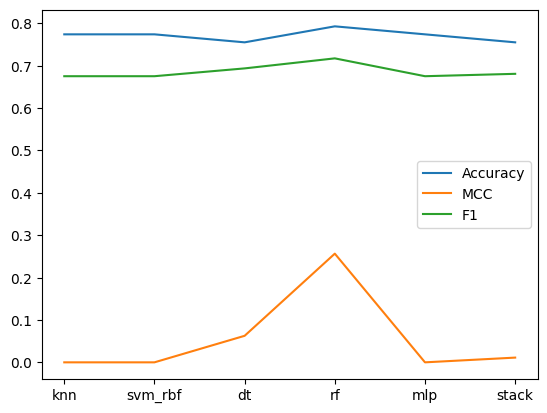

In [253]:
acc_test_list = {'knn':knn_test_accuracy,
'svm_rbf': svm_rbf_test_accuracy,
'dt': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'stack': stack_model_test_accuracy}

mcc_test_list = {'knn':knn_test_mcc,
'svm_rbf': svm_rbf_test_mcc,
'dt': dt_test_mcc,
'rf': rf_test_mcc,
'mlp': mlp_test_mcc,
'stack': stack_model_test_mcc}

f1_test_list = {'knn':knn_test_f1,
'svm_rbf': svm_rbf_test_f1,
'dt': dt_test_f1,
'rf': rf_test_f1,
'mlp': mlp_test_f1,
'stack': stack_model_test_f1}

acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df.plot(kind = "line")
df